# Data Analysis for Santa Clara Master Gardener Club by Michelle Petersen

In [394]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import json
import geojson
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

## Gather

#### Read Master Gardener Contacts and Nextdoor Neighborhood Information from Google Doc Spreadsheet

In [ ]:
import gspread
from google.oauth2 import service_account
from google.auth.transport.requests import AuthorizedSession

# The scope to read the spreadsheet
_GS_SCOPE = ['https://www.googleapis.com/auth/spreadsheets.readonly',
            'https://www.googleapis.com/auth/drive']

# The ID and range of the MasterGardener spreadsheet.
_GS_ID = '1pPOuRZ9YsKwXGKgxzSm9tXCR_dgkCY4WNh3rg_cFX08'

service_account_info = json.load(open('Master Gardener-7e906e507d9d.json'))
credentials = service_account.Credentials.from_service_account_info(
    service_account_info,
    scopes=_GS_SCOPE)

if credentials:
    gc = gspread.Client(auth=credentials)
    gc.session = AuthorizedSession(credentials)
    book = gc.open_by_key(_GS_ID)
    print(book.title)
    worksheet_list = book.worksheets()
    for worksheet in worksheet_list:
        print(worksheet)

In [ ]:
# Load the data from each sheet into a dataframe
df_contacts = pd.DataFrame(book.get_worksheet(0).get_all_values())
df_contact_neighborhood = pd.DataFrame(book.get_worksheet(1).get_all_values())
df_nextdoor_neighborhoods = pd.DataFrame(book.get_worksheet(2).get_all_values())

In [ ]:
# Update the column names for the contact worksheet
df_contacts.reset_index()
df_contacts.columns = ['Name', 'Email', 'Neighborhood', 'State', 'County', 'City']

In [ ]:
# Remove the row with column names since gspread reads it as data
df_contacts = df_contacts[df_contacts['Name'] != 'Name']

In [ ]:
# Verify column names and data
df_contacts.head()

In [ ]:
# Update the column names for the contact to neighborhood mapping worksheet
df_contact_neighborhood.reset_index()
df_contact_neighborhood.columns = ['Name', 'Neighborhood', 'State', 'County', 'City']

In [ ]:
# Remove the row with column names since gspread reads it as data
df_contact_neighborhood = df_contact_neighborhood[df_contact_neighborhood['Name'] != 'Name']

In [ ]:
# Verify column names and data
df_contact_neighborhood.head()

In [ ]:
# Update the column names for the nextdoor neighborhood worksheet
df_nextdoor_neighborhoods.reset_index()
df_nextdoor_neighborhoods.columns = ['State', 'County', 'City', 'Neighborhood', 'Link', 'Nextdoor ID', 
                                     'Geometry', 'Interests', 'Interest in Gardening', 'Percentage of Homeowners', 
                                     'Number of Residents', 'Average Age', 'Attributes', "Level of Gardening Interest",
                                     'Interest in Cycling', 'Level of Cycling Interest']

In [ ]:
# Remove the row with column names since gspread reads it as data
df_nextdoor_neighborhoods = df_nextdoor_neighborhoods[df_nextdoor_neighborhoods['Neighborhood'] != 'Neighborhood']

In [423]:
# Update columns to numeric data types
df_nextdoor_neighborhoods[["Nextdoor ID", "Interest in Gardening", "Interest in Cycling", "Percentage of Homeowners", "Number of Residents", "Average Age"]] = df_nextdoor_neighborhoods[["Nextdoor ID", "Interest in Gardening", "Interest in Cycling", "Percentage of Homeowners", "Number of Residents", "Average Age"]].apply(pd.to_numeric)

In [429]:
# Verify column names and data
df_nextdoor_neighborhoods.head()

,State,County,City,Neighborhood,Link,Nextdoor ID,Geometry,Interests,Interest in Gardening,Percentage of Homeowners,Number of Residents,Average Age,Attributes,Level of Gardening Interest,Interest in Cycling
1023,CA,Santa Clara,San Jose,Wooster/Tripp,https://nextdoor.com/neighborhood/3woostertrip...,170274,"{""type"": ""Feature"", ""geometry"": {""type"": ""Mult...","['Dogs', 'Hiking & Trails', 'Cooking', 'Home I...",4,32,1796,45,"['Friendly', 'Convenient', 'Dog Friendly', 'Do...",Medium,10
1024,CA,Santa Clara,Gilroy,Wren/ Wayland/ Welburn,https://nextdoor.com/neighborhood/wrenwaylandw...,288652,"{""type"": ""Feature"", ""geometry"": {""type"": ""Mult...","['Cooking', 'Walking', 'Home Improvement & DIY...",10,49,2400,51,"['Family Friendly', 'Friendly', 'Kids', 'Quiet...",None,10
1025,CA,Santa Clara,San Jose,Yarwood Ct,https://nextdoor.com/neighborhood/yarwoodct--s...,248533,"{""type"": ""Feature"", ""geometry"": {""type"": ""Mult...","['Hiking & Trails', 'Walking', 'Yoga', 'Seeing...",10,56,633,44,"['Dog Friendly', 'Proximity', 'Convenient', 'F...",None,10
1026,CA,Santa Clara,San Jose,Yerba Buena,https://nextdoor.com/neighborhood/7yerbabuena-...,170268,"{""type"": ""Feature"", ""geometry"": {""type"": ""Mult...","['Home Improvement & DIY', 'Dogs', 'Gardening ...",2,0,0,0,"['Proximity', 'Quiet', 'Walkability', 'Weather']",High,10
1027,CA,Santa Clara,Los Gatos,Zayante,https://nextdoor.com/neighborhood/zayanteca--l...,250201,"{""type"": ""Feature"", ""geometry"": {""type"": ""Mult...","['Hiking & Trails', 'Books', 'Photography', 'D...",4,80,1933,53,"['Secluded', 'Beautiful', 'Trees', 'Nature', '...",Medium,5


In [380]:
# Verify neighborhood columns and data
df_nextdoor_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 1 to 1027
Data columns (total 14 columns):
State                          1027 non-null object
County                         1027 non-null object
City                           1027 non-null object
Neighborhood                   1027 non-null object
Link                           1027 non-null object
Nextdoor ID                    1027 non-null int64
Geometry                       1027 non-null object
Interests                      1027 non-null object
Interest in Gardening          1027 non-null int64
Percentage of Homeowners       1027 non-null int64
Number of Residents            1027 non-null int64
Average Age                    1027 non-null int64
Attributes                     1027 non-null object
Level of Gardining Interest    1027 non-null object
dtypes: int64(5), object(9)
memory usage: 120.4+ KB


In [344]:
# Gather attribute data from neighborhoods
df_attributes = pd.read_csv("nextdoor_attributes_master.csv")

In [357]:
# Gather interest data from neighborhoods
df_interests = pd.read_csv("nextdoor_interests_master.csv")

## Store

In [519]:
# Resave neighborhood information to csv files for input to Tableau
df_nextdoor_neighborhoods.to_csv('nextdoor_with_properties_master.csv', index=False)

In [ ]:
# Resave information to csv files for input to Tableau
df_contacts.to_csv('mg_contacts_master.csv', index=False)
df_contact_neighborhood.to_csv('mg_contact_neighborhood_master.csv', index=False)

In [ ]:
# Save geographic information to geojson file for input to Tableau
from geojson import Point, Feature, FeatureCollection, dumps

features = []
for index, row in df_nextdoor_neighborhoods.iterrows():
    if (len(row["Geometry"]) > 0):
        features.append(json.loads(row["Geometry"]))

feature_collection = FeatureCollection(features)

with open('nextdoor_neighborhoods.geojson', 'w') as f:
   dump(feature_collection, f)

## Analysis and Visualization

### Viz 1:

In [388]:
df_interests["Interest"].nunique()

158

In [362]:
df_interests["Interest"].value_counts().nlargest(10)

Hiking & Trails           904
Walking                   876
Cooking                   839
Home Improvement & DIY    765
Dogs                      750
Gardening & Landscape     722
Seeing Live Music         591
Books                     556
Volunteering              518
Biking & Cycling          501
Name: Interest, dtype: int64

In [389]:
df_attributes["Attribute"].nunique()

80

In [361]:
df_attributes["Attribute"].value_counts().nlargest(10)

Family Friendly    694
Peaceful           675
Friendly           598
Clean              546
Dog Friendly       500
Quiet              487
Neighbors          462
Safe               455
Beautiful          414
Walkability        398
Name: Attribute, dtype: int64

In [435]:
df_nextdoor_neighborhoods.describe()

,Nextdoor ID,Interest in Gardening,Percentage of Homeowners,Number of Residents,Average Age,Interest in Cycling
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,197889.446933,5.941577,60.799416,2647.576436,45.721519,8.646543
std,91670.136795,10.074309,28.420757,2727.503741,16.299833,9.525113
min,822.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,167299.500000,2.000000,45.000000,809.000000,46.000000,6.000000
50%,179718.000000,4.000000,69.000000,1888.000000,50.000000,10.000000
75%,244652.000000,10.000000,83.000000,3633.500000,54.000000,10.000000
max,471965.000000,100.000000,98.000000,20571.000000,69.000000,100.000000


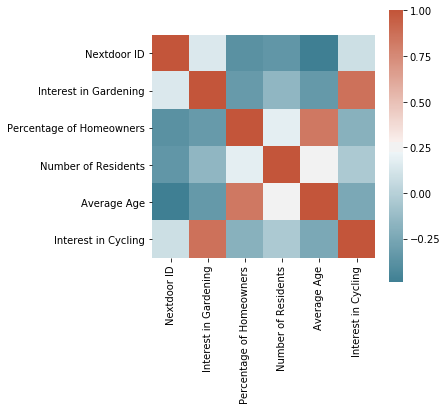

In [436]:
f, ax = plt.subplots(figsize=(5, 5))
corr = df_nextdoor_neighborhoods.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 20, as_cmap=True),
            square=True, ax=ax)

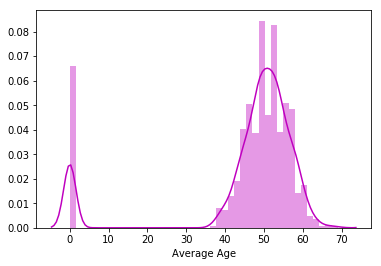

In [440]:
# Plot a historgram and kernel density estimate for Average Age
sns.distplot(df_nextdoor_neighborhoods["Average Age"], color="m")

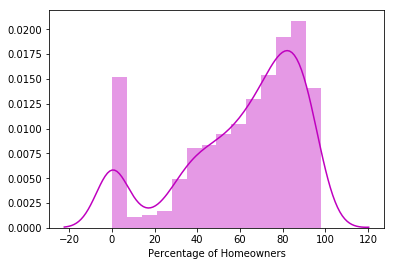

In [441]:
# Plot a historgram and kernel density estimate for Percentage of Homeowners
sns.distplot(df_nextdoor_neighborhoods["Percentage of Homeowners"], color="m")

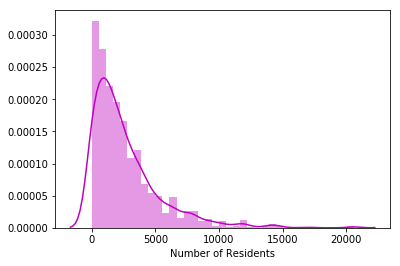

In [443]:
# Plot a historgram and kernel density estimate for Number of Residents
sns.distplot(df_nextdoor_neighborhoods["Number of Residents"], color="m")

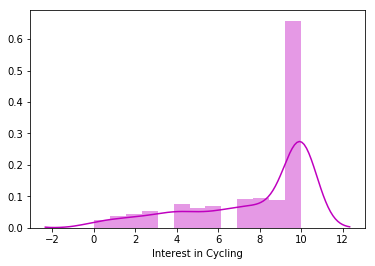

In [520]:
# Plot a historgram and kernel density estimate for Interest in Cycling
df_plot = df_nextdoor_neighborhoods.loc[df_nextdoor_neighborhoods["Interest in Cycling"] != 100]
sns.distplot(df_plot["Interest in Cycling"], color="m")

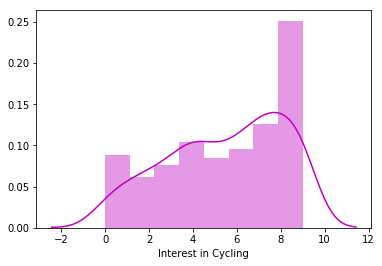

In [521]:
# Plot a historgram and kernel density estimate for Interest in Cycling
df_plot = df_plot.loc[df_plot["Interest in Cycling"] != 10]
sns.distplot(df_plot["Interest in Cycling"], color="m")

In [522]:
df_plot.describe()

,Nextdoor ID,Interest in Gardening,Percentage of Homeowners,Number of Residents,Average Age,Interest in Cycling
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,185797.555777,5.115538,62.948207,2719.567729,47.123506,5.438247
std,89404.307818,3.861189,27.302791,2823.627267,14.737649,2.651247
min,822.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164659.500000,2.000000,46.000000,886.000000,46.000000,3.000000
50%,178651.000000,4.000000,70.000000,1890.000000,51.000000,6.000000
75%,224778.000000,10.000000,85.000000,3609.750000,54.000000,8.000000
max,460423.000000,10.000000,98.000000,20571.000000,67.000000,9.000000


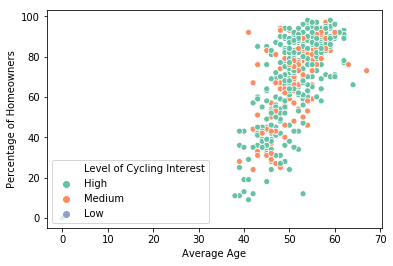

In [523]:
# Scatter plot for Interest in Cycling and Age and Homeownership
df_cycling = df_nextdoor_neighborhoods.loc[(df_nextdoor_neighborhoods["Level of Cycling Interest"] != "None") 
                                             & (df_nextdoor_neighborhoods["Level of Cycling Interest"] != "Other")]
interest_ranking = ["High", "Medium", "Low"]
sns.scatterplot(x="Average Age", y="Percentage of Homeowners", data=df_cycling, 
           hue='Level of Cycling Interest', legend="full", palette="Set2",
           hue_order=interest_ranking)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower left')

In [524]:
df_high = df_nextdoor_neighborhoods.loc[df_nextdoor_neighborhoods["Level of Cycling Interest"] == "High"]

In [525]:
df_high.describe()

,Nextdoor ID,Interest in Gardening,Percentage of Homeowners,Number of Residents,Average Age,Interest in Cycling
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,187143.505556,5.491667,62.030556,2168.158333,46.477778,4.238889
std,91701.439744,3.990230,28.581149,2329.501702,15.844458,2.147393
min,1126.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164664.500000,2.000000,44.750000,770.750000,46.000000,3.000000
50%,179742.500000,5.000000,69.000000,1493.500000,51.000000,4.000000
75%,231879.250000,10.000000,86.250000,2915.250000,55.000000,6.000000
max,460423.000000,10.000000,98.000000,20534.000000,64.000000,7.000000


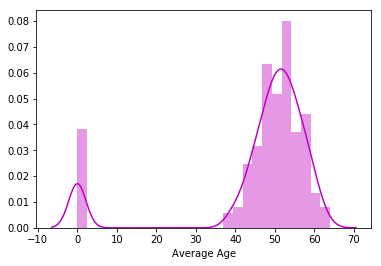

In [526]:
# Plot a historgram and kernel density estimate for Average Age for neighborhoods with a high interest in cycling
sns.distplot(df_high["Average Age"], color="m")